In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,NaN,0.0,0.53,0.22
2,0.64,0.62,0.49,NaN,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,NaN
1481,0.41,0.47,0.50,0.14,NaN,0.0,0.53,0.37
1482,0.51,0.45,NaN,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	74
float64		column 2	74
float64		column 3	74
float64		column 4	37
float64		column 5	111
float64		column 6	111
float64		column 7	37
float64		column 8	74


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1410.000000,1410.000000,1410.000000,1447.000000,1373.000000,1373.000000,1447.000000,1410.000000
mean,0.501681,0.501014,0.500021,0.260788,0.504734,0.007138,0.499889,0.273986
std,0.135420,0.123034,0.086193,0.135731,0.048439,0.074275,0.057591,0.103117
min,0.170000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

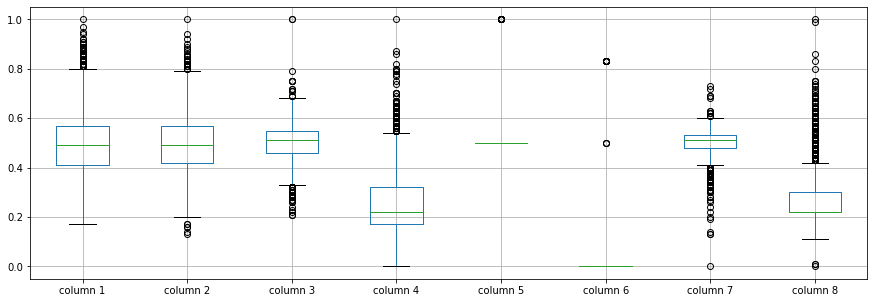

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.501681
column 2    0.501014
column 3    0.500021
column 4    0.260788
column 5    0.504734
column 6    0.007138
column 7    0.499889
column 8    0.273986
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.574056,-0.152178,0.144795,0.061268,0.003648,0.086541,-0.114645
column 2,0.574056,1.000000,-0.249178,0.134251,0.040203,-0.003460,0.087851,-0.096033
column 3,-0.152178,-0.249178,1.000000,0.065182,0.007307,0.015565,-0.184311,-0.035587
column 4,0.144795,0.134251,0.065182,1.000000,-0.012059,-0.012014,-0.099774,-0.060604
column 5,0.061268,0.040203,0.007307,-0.012059,1.000000,-0.009817,0.038364,0.001869
column 6,0.003648,-0.003460,0.015565,-0.012014,-0.009817,1.000000,0.027603,-0.049504
column 7,0.086541,0.087851,-0.184311,-0.099774,0.038364,0.027603,1.000000,0.086269
column 8,-0.114645,-0.096033,-0.035587,-0.060604,0.001869,-0.049504,0.086269,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+49,8+49+49,8+49+49+49,8+49+49+49+49,8+49+49+49+49+49,8+49+49+49+49+49+49,8+49+49+49+49+49,8+49+49+49+49,8+49+49+49,8+49+49,8+49,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.771712577861288
Epoch: 1 , loss: 2.306441969197729
Epoch: 2 , loss: 2.1408700346946716
Epoch: 3 , loss: 1.9963861366976863
Epoch: 4 , loss: 1.8689433426960655
Epoch: 5 , loss: 1.8003915133683577
Epoch: 6 , loss: 1.7199872835822727
Epoch: 7 , loss: 1.6402129932590153
Epoch: 8 , loss: 1.5599207087703373
Epoch: 9 , loss: 1.526632485182389
Epoch: 10 , loss: 1.483586355395939
Epoch: 11 , loss: 1.4240396592928015
Epoch: 12 , loss: 1.4120702575082364
Epoch: 13 , loss: 1.3446652954039366
Epoch: 14 , loss: 1.3274266136729198
Epoch: 15 , loss: 1.2950636530699937
Epoch: 16 , loss: 1.2481771415990333
Epoch: 17 , loss: 1.2435080247080845
Epoch: 18 , loss: 1.218980905154477
Epoch: 19 , loss: 1.1947840316140133
Epoch: 20 , loss: 1.185449401969495
Epoch: 21 , loss: 1.166885908531106
Epoch: 22 , loss: 1.1598244639842406
Epoch: 23 , loss: 1.1339895096809969
Epoch: 24 , loss: 1.1287044954040777
Epoch: 25 , loss: 1.10072

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
1,0.0,0.0,0.000000,0.000000,0.028039,0.0,0.000000,0.00000
2,0.0,0.0,0.000000,-0.001125,0.000000,0.0,0.000000,0.00000
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
1480,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,-0.42565
1481,0.0,0.0,0.000000,0.000000,-0.213143,0.0,0.000000,0.00000
1482,0.0,0.0,-0.126373,0.000000,0.000000,0.0,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3.948494696334, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.08418221465049536

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.470000,0.130000,0.500000,0.0,0.480000,0.22000
1,0.43,0.67,0.480000,0.270000,0.528039,0.0,0.530000,0.22000
2,0.64,0.62,0.490000,0.148875,0.500000,0.0,0.530000,0.22000
3,0.58,0.44,0.570000,0.130000,0.500000,0.0,0.540000,0.22000
4,0.42,0.44,0.480000,0.540000,0.500000,0.0,0.480000,0.22000
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.470000,0.180000,0.500000,0.0,0.500000,0.22000
1480,0.35,0.29,0.460000,0.140000,0.500000,0.0,0.540000,0.23435
1481,0.41,0.47,0.500000,0.140000,0.286857,0.0,0.530000,0.37000
1482,0.51,0.45,0.493627,0.250000,0.500000,0.0,0.590000,0.22000


In [20]:
imputations[-1].to_excel("Yeast_NL_5(imp).xlsx", index=False, header=False)